## About Dataset
Description :
This dataset contains 1,000 fictional freelancer profiles from around the world, designed to reflect realistic variability and messiness often encountered in real-world data collection.

https://www.kaggle.com/datasets/urvishahir/global-freelancers-raw-dataset

-----

# SETUP

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries</b>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
mycolors = sns.color_palette("RdBu", 10)

# Set dark theme (similar to VSCode dark)
sns.set_theme(style="darkgrid", palette=mycolors, )

# Optional: adjust plot size globally
plt.rcParams["figure.figsize"] = (6, 4)
mycolors

[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

---
# READING DATASET
---

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Import dataset using Pandas</b>
</div>

In [4]:
data_set= pd.read_csv('C:/Users/DAR-M/Downloads/DEPI/Data/global_freelancers_raw.csv')

---
# DATA INSPECTION
---

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Checking the shape of the Dataset</b>
</div>

In [5]:
data_set.shape

(1000, 12)

In [6]:
#Display the first few rows.

data_set.head(n=8)

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%
5,FL250006,Lisa Johnson,female,59.0,Netherlands,Dutch,AI,14.0,$30,2.4,False,NaN
6,FL250007,Eric Myers,m,52.0,Indonesia,Indonesian,Data Analysis,10.0,USD 75,3.1,0,94%
7,FL250008,Ricky Graham,male,43.0,Italy,Italian,Blockchain Development,14.0,USD 40,4.6,False,94%


In [7]:
data_set.sample(n=9)

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
37,FL250038,Amy Harrison,F,29.0,Netherlands,Dutch,Graphic Design,10.0,40,2.2,N,67%
786,FL250787,Michelle Gregory,Female,25.0,Brazil,Portuguese,Machine Learning,3.0,$50,3.2,True,74%
241,FL250242,Sarah Ho,female,32.0,Mexico,Spanish,AI,1.0,100,4.7,0,67%
440,FL250441,Scott Washington,Male,34.0,Argentina,Spanish,Mobile Apps,15.0,75,NaN,0,73%
672,FL250673,Javier Hobbs,Male,30.0,Spain,Spanish,Graphic Design,4.0,NaN,2.8,1,71%
540,FL250541,Kenneth Vasquez,Male,30.0,Japan,Japanese,Blockchain Development,5.0,$30,4.8,N,NaN
270,FL250271,Melanie Harris,FEMALE,47.0,South Africa,Afrikaans,Mobile Apps,14.0,NaN,NaN,False,69%
165,FL250166,Robin Acosta,female,31.0,South Africa,Afrikaans,Web Development,NaN,USD 75,1.3,1,65%
828,FL250829,Lindsay Le,female,50.0,South Korea,Korean,Web Development,12.0,$75,0.0,False,75


<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Checking the number of Columns in the Dataset</b>
</div>

In [8]:
data_set.columns

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

In [9]:
data_set.is_active.value_counts()

is_active
1        190
0        182
N         98
False     97
Y         94
no        88
yes       85
True      77
Name: count, dtype: int64

In [10]:
data_set.rating.value_counts()

rating
0.0    145
3.6     29
4.7     26
1.1     24
1.3     24
2.5     23
1.4     23
4.0     22
4.6     21
3.3     20
2.3     20
4.5     20
2.2     20
2.4     20
4.8     20
3.2     20
4.9     20
1.5     19
1.6     19
4.3     19
1.2     19
1.7     19
1.8     18
3.1     18
2.9     18
2.7     18
2.0     17
3.8     17
2.8     17
3.7     17
2.1     17
4.2     16
4.1     16
3.9     16
3.4     15
2.6     14
3.5     14
1.9     14
3.0     14
4.4     14
5.0     10
1.0      7
Name: count, dtype: int64

In [11]:
data_set.client_satisfaction.value_counts()

client_satisfaction
68%    23
78%    23
64%    23
63%    22
96%    22
       ..
74      1
67      1
65      1
66      1
89      1
Name: count, Length: 81, dtype: int64

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Information about the Dataset</b>
</div>

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [13]:
data_set.describe(include='number')

,age,years_of_experience,rating
count,970.000000,949.000000,899.000000
mean,40.509278,11.340358,2.512570
std,11.942605,9.680610,1.546599
min,20.000000,0.000000,0.000000
25%,31.000000,3.000000,1.400000
50%,41.000000,9.000000,2.600000
75%,51.000000,17.000000,3.800000
max,60.000000,41.000000,5.000000


In [14]:
data_set.describe(include='object')

,freelancer_ID,name,gender,country,language,primary_skill,hourly_rate (USD),is_active,client_satisfaction
count,1000,1000,1000,1000,1000,1000,906,911,824
unique,1000,992,10,21,16,10,18,8,81
top,FL251000,Amy Lee,FEMALE,South Korea,English,DevOps,40,1,68%
freq,1,2,115,68,215,112,94,190,23


---
# Data Cleaning
---

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Checking if there are any null values in the dataset </b>
</div>

In [15]:
data_set.isnull().sum()

freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64

<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Checking if there are any duplicate values in the dataset </b>
</div>

In [16]:
data_set.duplicated().sum()

np.int64(0)

## Data Format or rename columns

In [17]:
data_set.columns

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

In [18]:
data_set.dtypes

freelancer_ID           object
name                    object
gender                  object
age                    float64
country                 object
language                object
primary_skill           object
years_of_experience    float64
hourly_rate (USD)       object
rating                 float64
is_active               object
client_satisfaction     object
dtype: object

In [19]:
data_set.sample(n=8)

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
477,FL250478,Matthew Gay,M,56.0,Netherlands,Dutch,DevOps,16.0,USD 30,0.0,yes,NaN
795,FL250796,Dwayne Parks,m,53.0,Russia,Russian,Cybersecurity,12.0,100,4.7,1,87%
532,FL250533,Thomas Dixon,MALE,22.0,India,Hindi,AI,0.0,NaN,4.6,False,NaN
861,FL250862,Christopher Johnson,Male,60.0,Japan,Japanese,AI,NaN,20,2.2,False,60%
855,FL250856,Kevin Serrano,Male,41.0,Turkey,Turkish,DevOps,12.0,NaN,1.3,0,85%
71,FL250072,Thomas Miller,M,60.0,Italy,Italian,DevOps,13.0,USD 50,1.0,False,NaN
472,FL250473,Ian May,MALE,36.0,France,French,Blockchain Development,11.0,$40,1.3,True,NaN
814,FL250815,Alan Williams,m,22.0,South Korea,Korean,UI/UX Design,4.0,$40,3.8,True,100%


In [20]:
data_set.gender.value_counts()

gender
FEMALE    115
M         106
f         103
Male      103
MALE      102
male      100
m          99
Female     96
F          90
female     86
Name: count, dtype: int64

In [21]:
data_set['gender'] = data_set['gender'].replace({
    'FEMALE': 'female' ,
    'f' : 'female' ,
    'F' : 'female' ,
    'Female' : 'female' ,
    'M' : 'male' ,
    'Male' : 'male' ,
    'MALE' : 'male' ,
    'm' : 'male'
})

In [22]:
data_set['gender'].value_counts()

gender
male      510
female    490
Name: count, dtype: int64

----


In [23]:
data_set['is_active'].value_counts()

is_active
1        190
0        182
N         98
False     97
Y         94
no        88
yes       85
True      77
Name: count, dtype: int64

In [24]:
data_set['is_active'].replace({
    'N' : '0' ,
    'False' : '0' ,
    'no' :'0' ,
    'Y' : '1' ,
    'yes' : '1' ,
    'True' : '1' 
} , inplace=True) 

In [25]:
data_set['is_active'].value_counts()

is_active
0    465
1    446
Name: count, dtype: int64

In [26]:
data_set.rename(columns={'hourly_rate (USD)' :'hourly_rate_(USD)'} , inplace=True)

---

## Missing Data Analysis

In [27]:
def check_missing(data_set):
    missing = data_set.isna().sum()
    missing = missing[missing>0].sort_values()
    missing_df = pd.DataFrame(missing, columns=['Missing#'])
    missing_df['Missing%'] = missing_df['Missing#']/len(data_set)
    missing_df = missing_df.reset_index(names='Feature')

    return missing_df

In [28]:
# Check for missing values
check_missing(data_set)

,Feature,Missing#,Missing%
0,age,30,0.030
1,years_of_experience,51,0.051
2,is_active,89,0.089
3,hourly_rate_(USD),94,0.094
4,rating,101,0.101
5,client_satisfaction,176,0.176


### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Visualize Missing Values Plots </b>
</div>

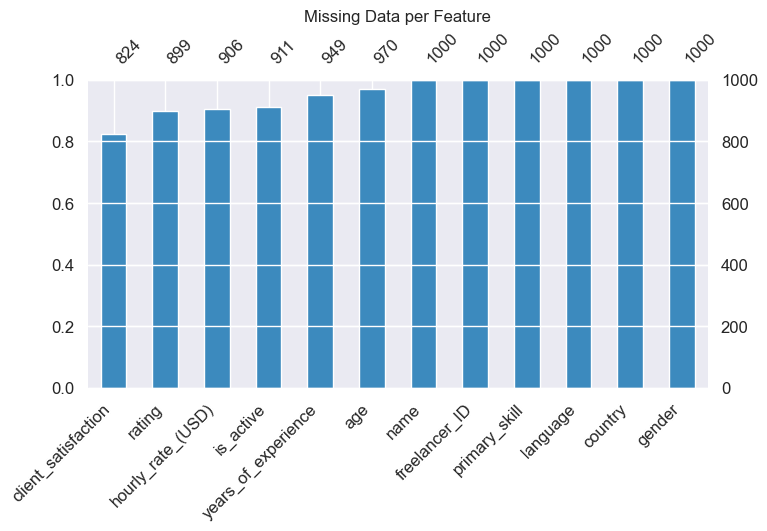

In [29]:
# Bar chart showing total missing values per feature
msno.bar(data_set, color=mycolors[8], fontsize=12, figsize=(8, 4), sort='ascending')
plt.title("Missing Data per Feature")
plt.show()

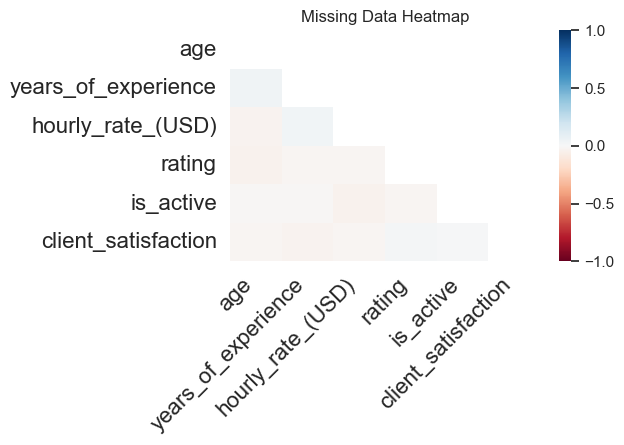

In [ ]:
# Heatmap to detect correlations in missingness

msno.heatmap(data_set, figsize=(5, 3))
plt.title("Missing Data Heatmap")
plt.show()


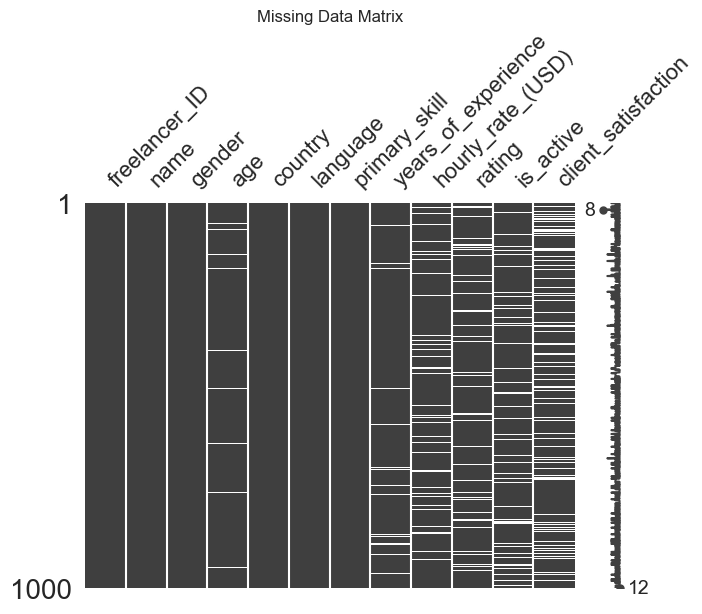

In [31]:
# Visualize row-wise missing patterns

msno.matrix(data_set,figsize=(7,5))
plt.title("Missing Data Matrix")
plt.show()


### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Handle Missing Values </b>
</div>

In [32]:
# Impute missing values of 'age' with median

data_set['age'].fillna(data_set['age'].median(), inplace=True)

In [33]:
# Impute missing values of 'years_of_experience' with median

data_set['years_of_experience'].fillna(data_set['years_of_experience'].median(), inplace=True)

In [34]:
# Impute missing values of 'rtaing' with mean

data_set['rating'].fillna(data_set['rating'].mean(),inplace=True)

In [35]:
# Impute missing (is active) with most frequent value (mode)

data_set['is_active'].fillna(data_set['is_active'].mode()[0],inplace=True)

In [36]:
# Impute missing (hourly_rate) with most frequent value (mode)
data_set['hourly_rate_(USD)'].fillna(data_set['hourly_rate_(USD)'].mode()[0],inplace=True)

In [37]:
# Impute missing (client_satisfaction) with most frequent value (mode)

data_set['client_satisfaction'].fillna(data_set['client_satisfaction'].mode()[0],inplace=True)

In [38]:
# Impute missing (is active) with most frequent value (mode)

data_set['is_active'].fillna(data_set['is_active'].mode()[0],inplace=True)

In [39]:
# Check for missing values after handle process
check_missing(data_set)

,Feature,Missing#,Missing%


----


In [40]:
data_set['hourly_rate_(USD)'].value_counts()

hourly_rate_(USD)
40         188
100         80
50          78
75          77
30          70
20          66
$20         43
$100        40
USD 30      40
$30         40
$50         39
$40         39
USD 40      38
USD 100     37
USD 50      35
USD 20      33
USD 75      31
$75         26
Name: count, dtype: int64

In [41]:
# convert data type of hourly_rate (USD) Column

data_set['hourly_rate_(USD)'] = (data_set['hourly_rate_(USD)']
    .astype(str)                  
    .str.replace(r"[^0-9]", "", regex=True) 
    .replace("", "0")                  
    .astype(int)                      
)


In [42]:
data_set['hourly_rate_(USD)'].value_counts()

hourly_rate_(USD)
40     265
100    157
50     152
30     150
20     142
75     134
Name: count, dtype: int64

In [43]:
data_set.sample(n=10)

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate_(USD),rating,is_active,client_satisfaction
634,FL250635,David Martinez,male,52.0,China,Mandarin,UI/UX Design,4.0,75,2.30000,1,79%
377,FL250378,Mary Brown,female,23.0,Germany,German,Machine Learning,4.0,20,4.70000,1,84%
616,FL250617,Matthew Steele,male,38.0,Turkey,Turkish,Blockchain Development,19.0,40,0.00000,1,86%
685,FL250686,Matthew Baldwin,male,52.0,South Korea,Korean,Graphic Design,21.0,40,4.00000,0,69%
215,FL250216,Danny Brown,male,41.0,India,Hindi,Machine Learning,12.0,20,0.00000,1,80%
639,FL250640,Gina Snyder,female,49.0,Mexico,Spanish,Web Development,24.0,50,0.00000,0,94%
530,FL250531,William Davis,male,28.0,Canada,English,Blockchain Development,5.0,50,0.00000,1,96
330,FL250331,Tammy Hill,female,53.0,United States,English,Mobile Apps,33.0,100,2.51257,0,75%
253,FL250254,Anthony Nichols,male,24.0,Spain,Spanish,Mobile Apps,3.0,75,2.00000,0,64%
703,FL250704,Daniel Lopez,male,35.0,Canada,English,Machine Learning,10.0,20,3.20000,1,77%


In [44]:
data_set[['age','years_of_experience']] =data_set[['age','years_of_experience']].astype(int)

In [45]:
data_set.dtypes

freelancer_ID           object
name                    object
gender                  object
age                      int64
country                 object
language                object
primary_skill           object
years_of_experience      int64
hourly_rate_(USD)        int64
rating                 float64
is_active               object
client_satisfaction     object
dtype: object

In [46]:
# check duplicated after handle missing values

data_set.duplicated().sum()

np.int64(0)

In [47]:
# Remove 'Name' column from dataset
data_set.drop(columns=['name'] , inplace=True)

### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Sample from dataset after Cleaning  </b>
</div>

In [48]:
data_set.sample(n=7)

,freelancer_ID,gender,age,country,language,primary_skill,years_of_experience,hourly_rate_(USD),rating,is_active,client_satisfaction
659,FL250660,female,56,Canada,English,Cybersecurity,19,20,0.00000,0,87%
464,FL250465,female,49,Brazil,Portuguese,Machine Learning,13,100,2.50000,0,64%
474,FL250475,male,42,United States,English,UI/UX Design,14,30,1.30000,0,94%
692,FL250693,female,31,France,French,Mobile Apps,9,50,1.40000,0,80%
131,FL250132,female,57,France,French,Machine Learning,0,50,1.60000,0,60%
361,FL250362,male,41,Japan,Japanese,Data Analysis,22,50,1.60000,1,61%
984,FL250985,male,48,South Africa,Afrikaans,Web Development,8,50,2.51257,1,73%


In [49]:
data_set.shape

(1000, 11)

# EDA FOR FEATURES

1. Univariate analysis of categorical features.
2. Univariate analysis of numerical features.
3. Multivariate analysis of categorical features with the other numerical features. 
4. Heatmap for correlation analysis (numerical features).

In [50]:
num_col = data_set.select_dtypes('number').columns
cat_col = data_set.select_dtypes('object').columns

print("Numerical Features :" , num_col)
print("\n Categorical Features :" , cat_col)

Numerical Features : Index(['age', 'years_of_experience', 'hourly_rate_(USD)', 'rating'], dtype='object')

 Categorical Features : Index(['freelancer_ID', 'gender', 'country', 'language', 'primary_skill',
       'is_active', 'client_satisfaction'],
      dtype='object')


### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Categorical Features Distribution </b>
</div>


Count plots showing the distribution of all categorical features in the dataset.  


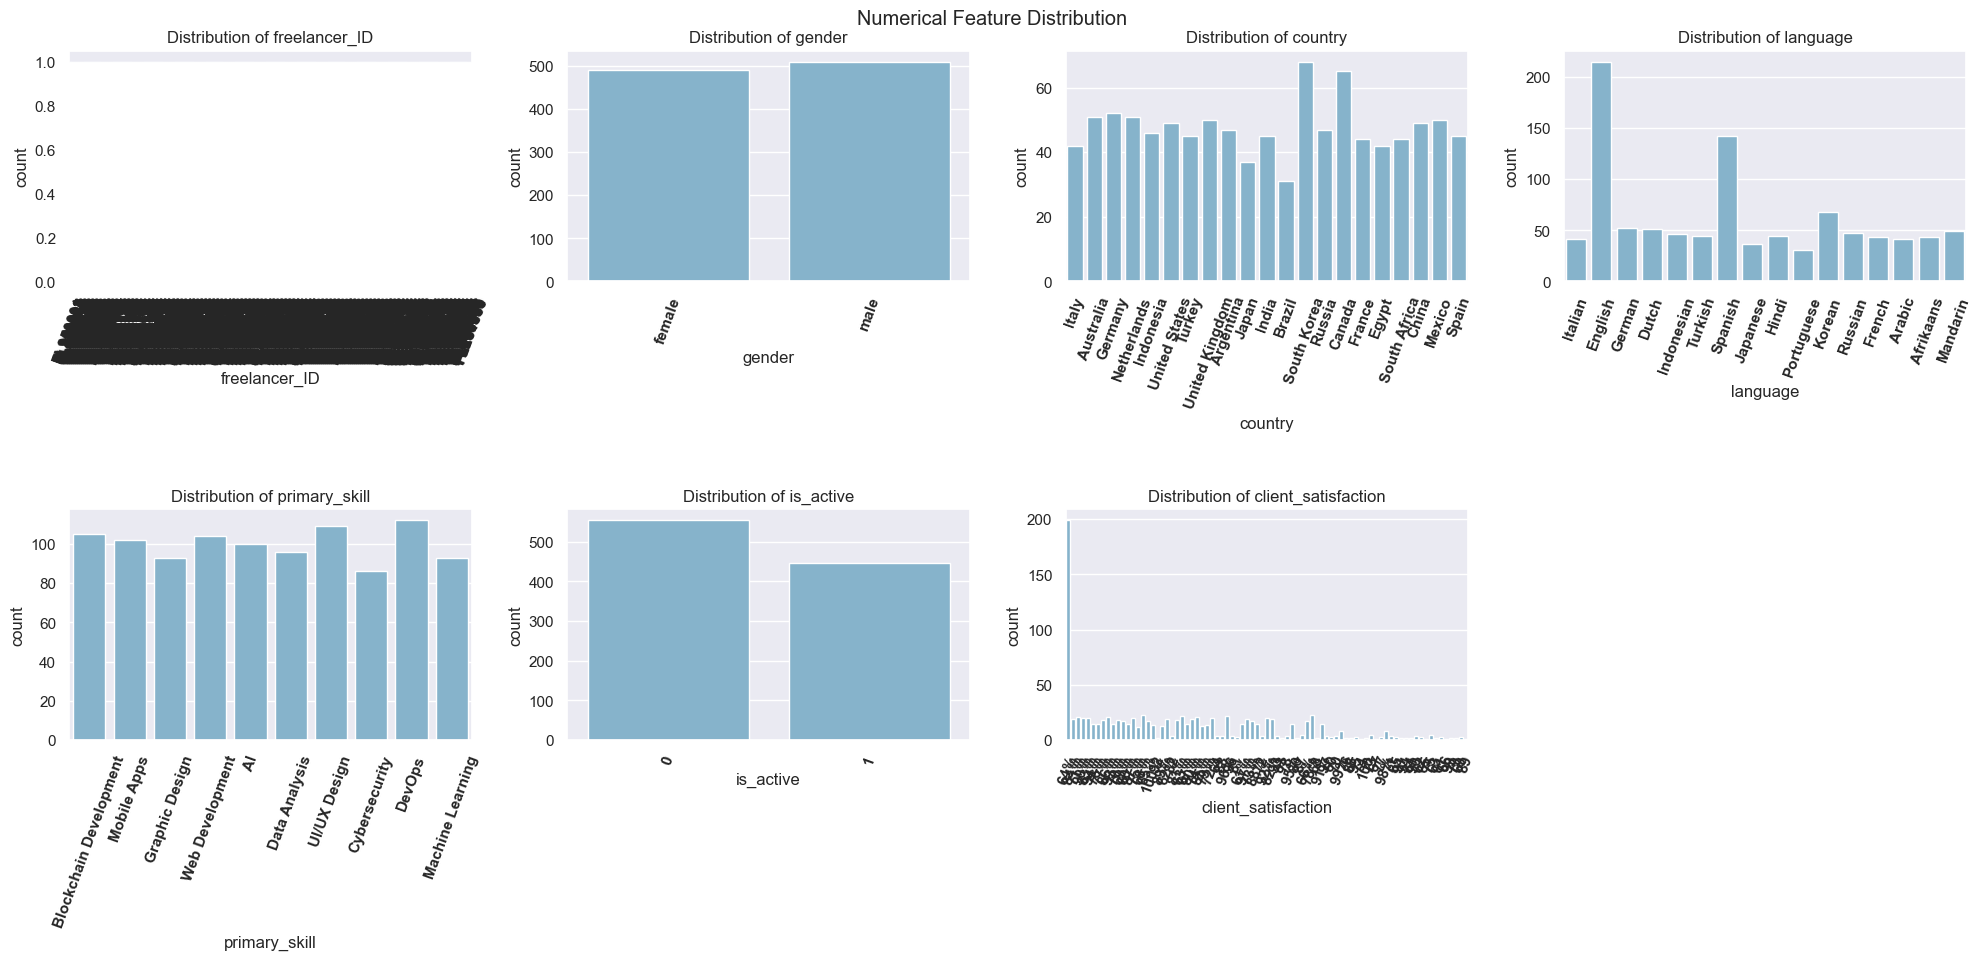

In [89]:
fig = plt.figure(figsize=(20,17)) 

for i, col in enumerate(cat_col):
    plt.subplot(4,4, i+1)
    sns.countplot(data = data_set, x=f'{col}',color=mycolors[7] )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation= 70 , weight="bold")

plt.suptitle("Numerical Feature Distribution")
plt.tight_layout()
plt.show()

### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Numerical Features Distribution </b>
</div>


###   Histograms (with KDE) showing the distribution of all numerical features in the dataset.

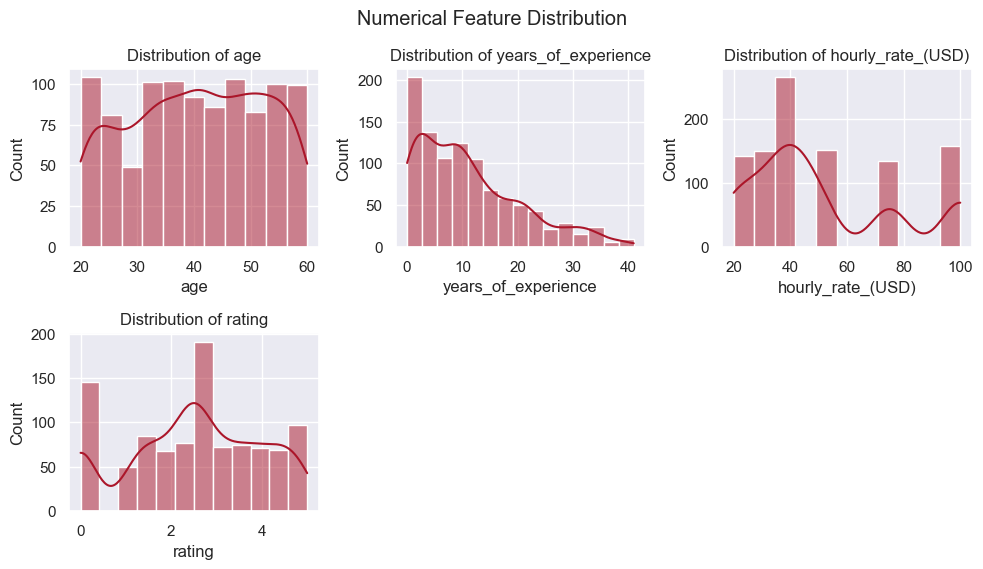

In [52]:
fig = plt.figure(figsize=(10, 8)) 

for i, col in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.histplot(data = data_set, x=f'{col}', kde=True)
    plt.title(f"Distribution of {col}")

plt.suptitle("Numerical Feature Distribution")
plt.tight_layout()
plt.show()

### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Number of freelancers by gender (male/female). </b>
</div>


### Gender Distribution  
Bar chart and pie chart showing the distribution of users by gender.  

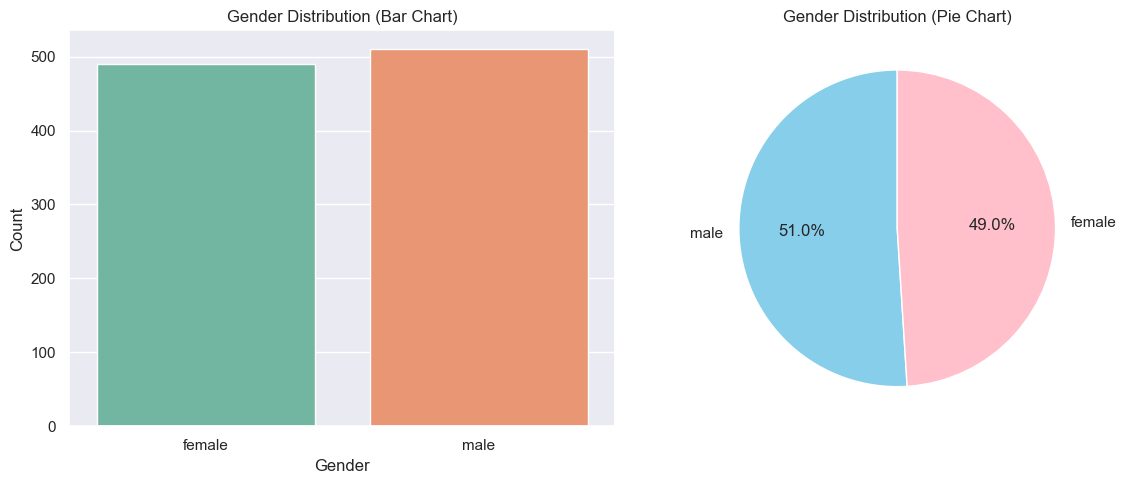

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  
sns.countplot(x="gender", data=data_set, palette="Set2")
plt.title("Gender Distribution (Bar Chart)")
plt.xlabel("Gender")
plt.ylabel("Count")

# Pie Chart
gender_counts = data_set["gender"].value_counts()


plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%",
        colors=["skyblue", "pink"], startangle=90)

plt.title("Gender Distribution (Pie Chart)")
plt.tight_layout()
plt.show()


In [54]:
data_set.columns

Index(['freelancer_ID', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate_(USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The relationship between age and Experience </b>
</div>

## Age vs Years of Experience

- **Scatter Plot:** Shows individual points of age vs experience, highlighting trends.  
- **Boxplot:** Summarizes experience distribution by age, showing median, quartiles, and outliers.  
- **Insight:** Generally, as age increases, years of experience also tend to increase.

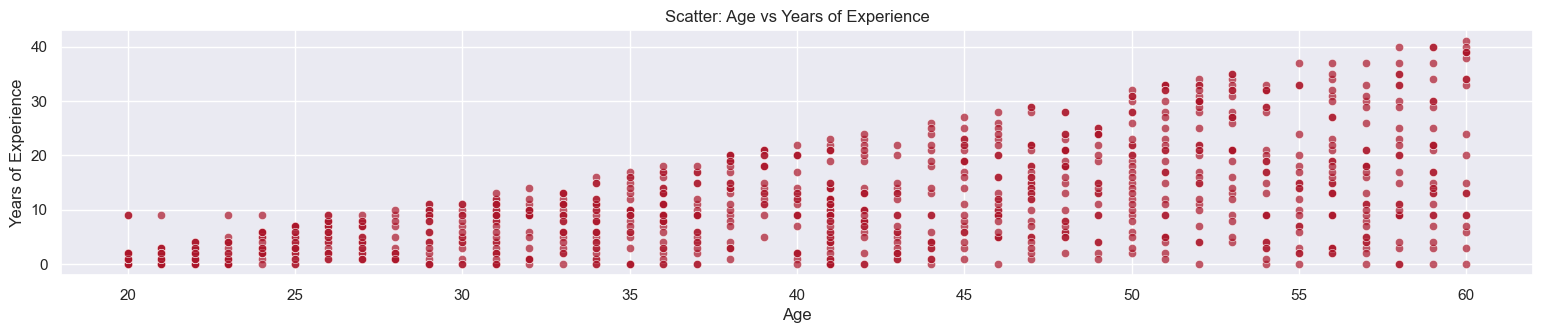

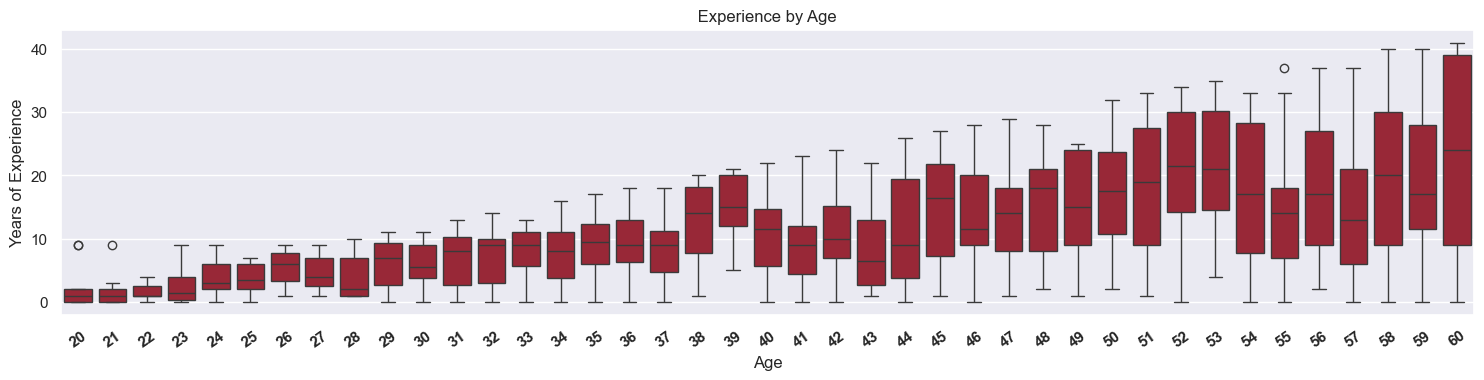

In [97]:
plt.figure(figsize=(19,7))

# 1️ Scatter Plot
plt.subplot(2,1 , 1)  
sns.scatterplot(x='age' ,y='years_of_experience',data=data_set,alpha=0.7)
plt.title("Scatter: Age vs Years of Experience")
plt.xlabel("Age")
plt.ylabel("Years of Experience")

# 2️ Boxplot
plt.figure(figsize=(15,7))

plt.subplot(2, 1, 2)
sns.boxplot(x= 'age' , y='years_of_experience', data=data_set )
plt.title(" Experience by Age ")
plt.xlabel("Age")
plt.ylabel("Years of Experience")
plt.xticks(rotation=35 ,weight='bold')

plt.tight_layout()
plt.show()


### Age Distribution  
Histogram and boxplot showing how users' ages are distributed.  

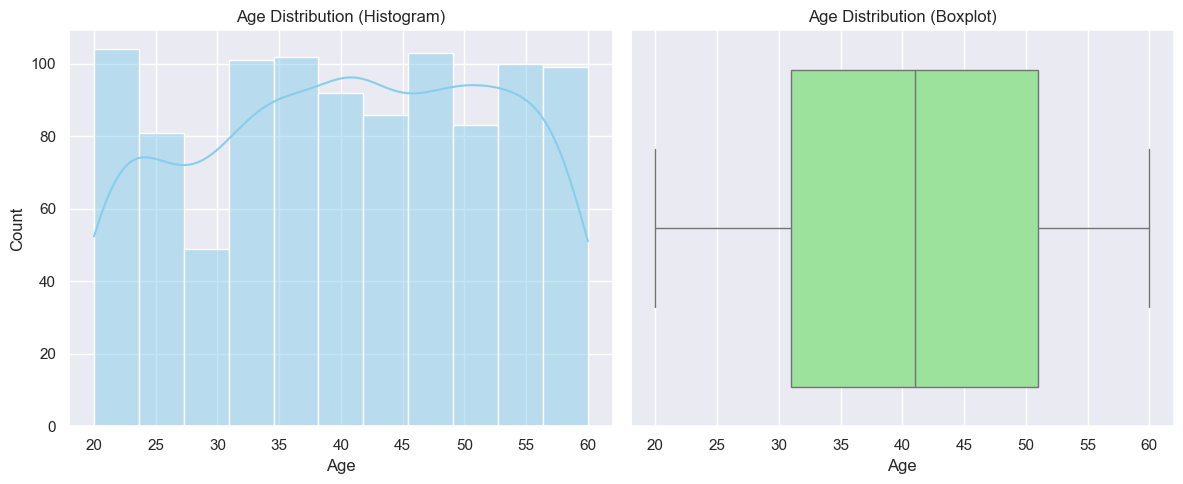

In [ ]:
plt.figure(figsize=(12,5))

# 1. Histogram for Age

plt.subplot(1,2,1)
sns.histplot(x='age',data=data_set, color="skyblue",kde=True)
plt.title("Age Distribution (Histogram)")
plt.xlabel("Age")
plt.ylabel("Count")

#2. Boxplot for Age

plt.subplot(1,2,2)
sns.boxplot(x="age",data=data_set ,color="lightgreen")
plt.title("Age Distribution (Boxplot)")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The Number of freelancers in each country </b>
</div>

### Country Distribution  
Bar chart showing the distribution of users by country.  
- **Top Countries:** South Korea and Canada have the highest number of freelancers in the dataset.


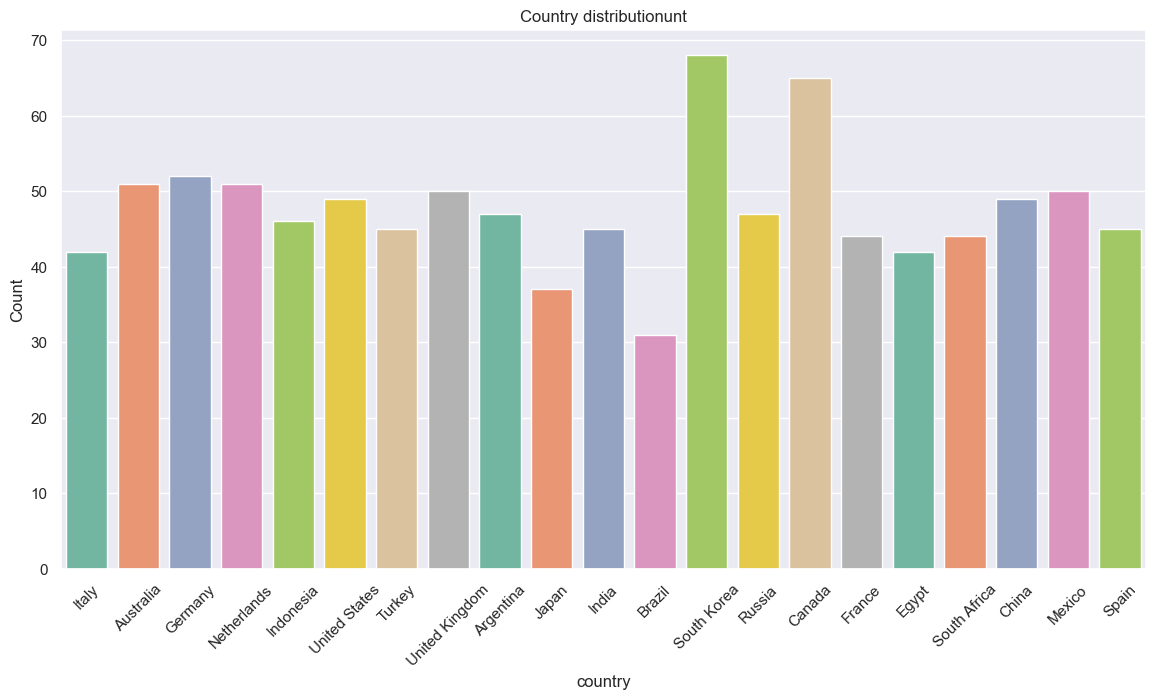

In [58]:
plt.figure(figsize=(14,7))
sns.countplot(x="country", data=data_set, palette="Set2")
plt.title("Country distributionunt")
plt.xlabel("country")
plt.ylabel("Count")
plt.xticks(rotation= 45)
plt.show()


### Hourly Rate by Country  
Bar chart showing the average hourly rate (USD) across countries. 
- **Insight:** India and Argentina have the highest number of freelancers based on hourly rate distribution.



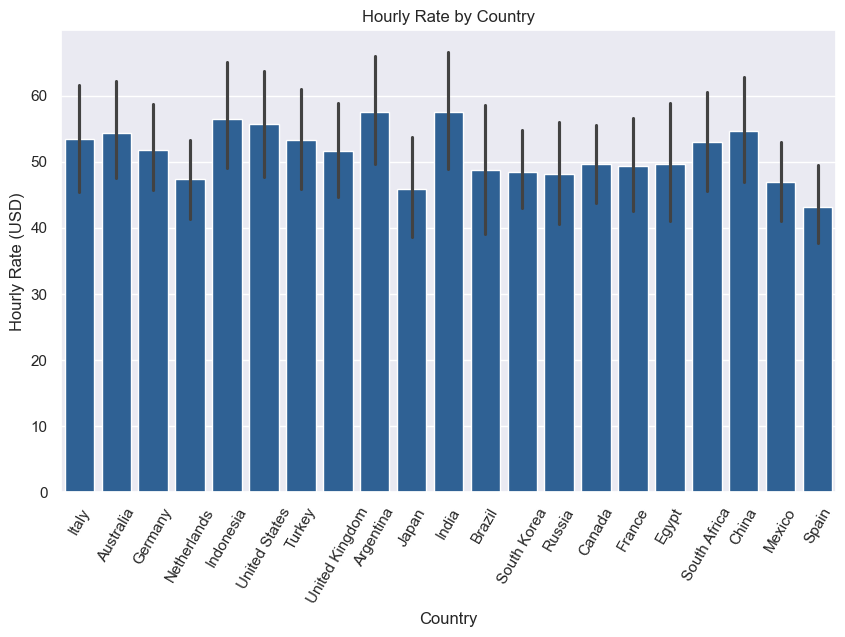

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_set, x="country", y="hourly_rate_(USD)", color=mycolors[9])
plt.title("Hourly Rate by Country")
plt.xlabel("Country")
plt.ylabel("Hourly Rate (USD)")
plt.xticks(rotation= 60)
plt.show()

### Average Rating by Country (Top 10)  
Bar chart showing the top 10 countries with the highest average rating.  

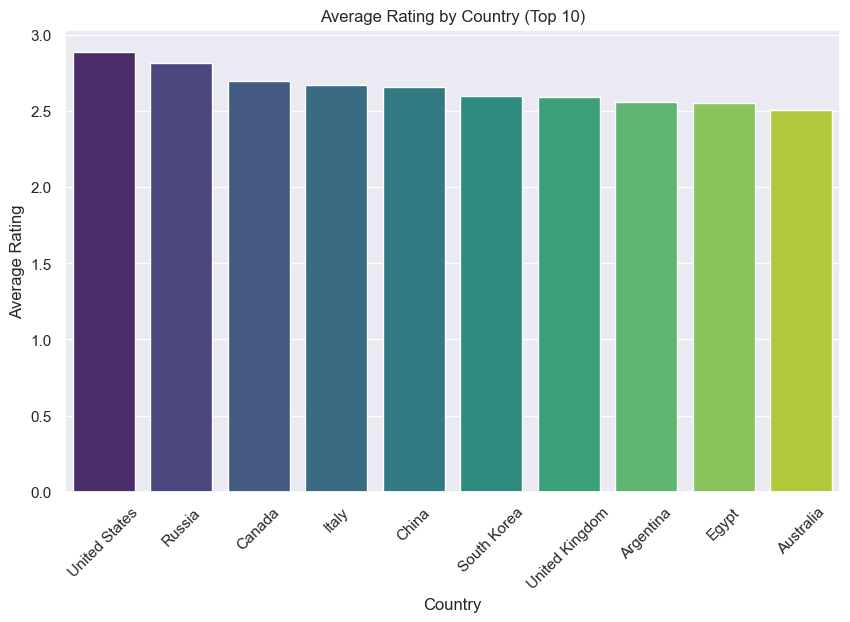

In [60]:
plt.figure(figsize=(10,6))
avg_rating = data_set.groupby("country")["rating"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="viridis")
plt.title("Average Rating by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


### Top Primary Skills  
Bar chart showing the frequency of primary skills among users.  

- **Top Primary Skills:** UI/UX and DevOps are the most common primary skills among freelancers.

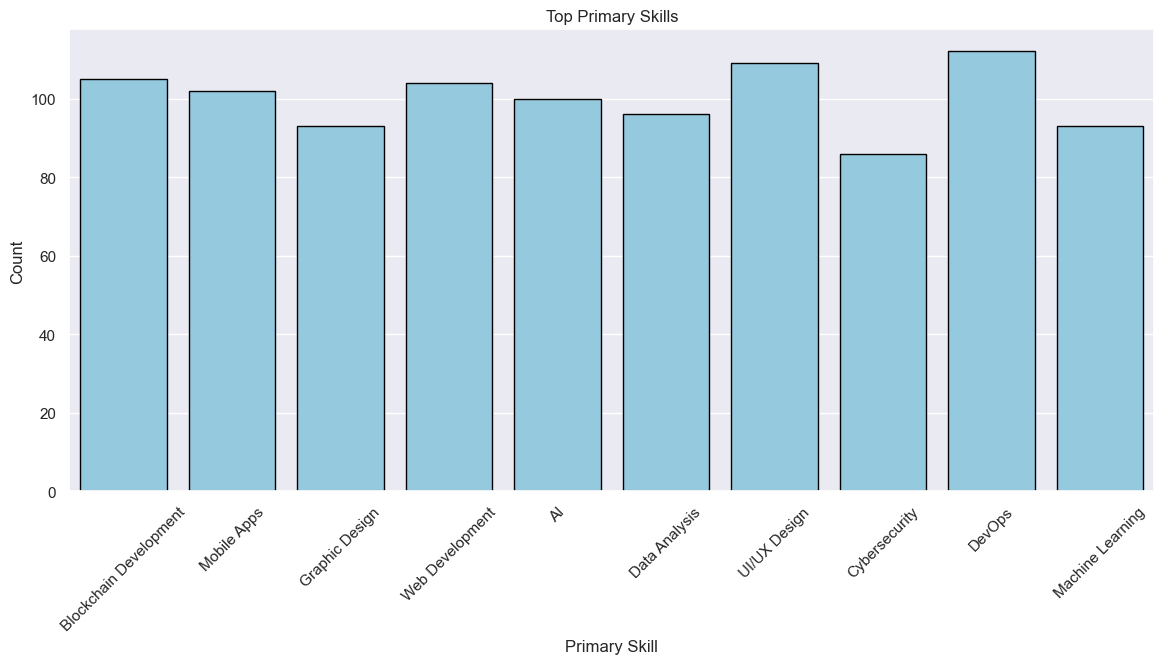

In [61]:
skill_counts = data_set.primary_skill.value_counts()

plt.figure(figsize=(14,6))

# Bar Chart
sns.countplot(x='primary_skill' ,data=data_set, color="skyblue", edgecolor="black")
plt.title("Top Primary Skills")
plt.xlabel("Primary Skill")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

## Average Rating by Client Satisfaction

- **Bar Plot:** Shows the mean `rating` for each category of `client_satisfaction`.  
- Helps identify which satisfaction levels correspond to higher or lower average ratings.


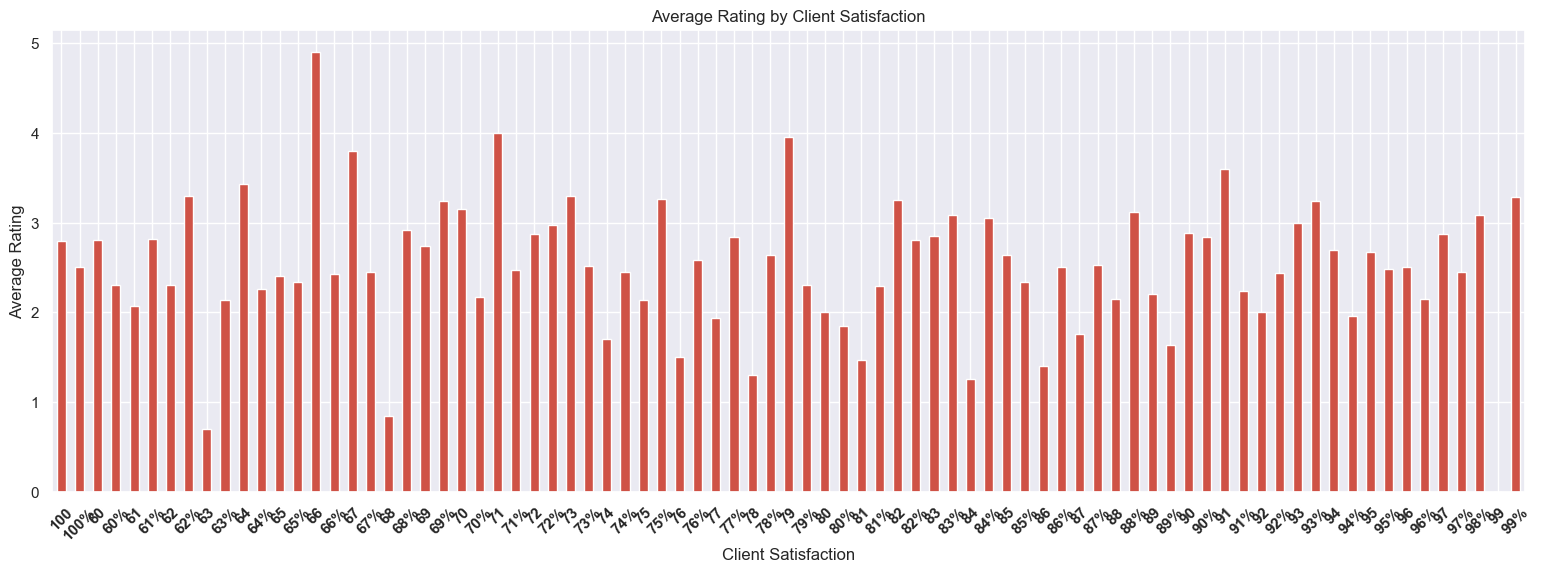

In [ ]:
avg_rating = data_set.groupby("client_satisfaction")["rating"].mean()

avg_rating.plot(kind="bar", figsize=(19,6),color=mycolors[1])

plt.title("Average Rating by Client Satisfaction")
plt.xlabel("Client Satisfaction")
plt.ylabel("Average Rating")
plt.xticks(rotation=45 ,weight = "bold")
plt.show()


## Hourly Rate vs Years of Experience

- **Bar Plot:** Shows the relationship between freelancers' hourly rate and their years of experience.  
- Helps identify how experience might influence pricing.
- The plot shows **no strong correlation** between years of experience and hourly rate. 

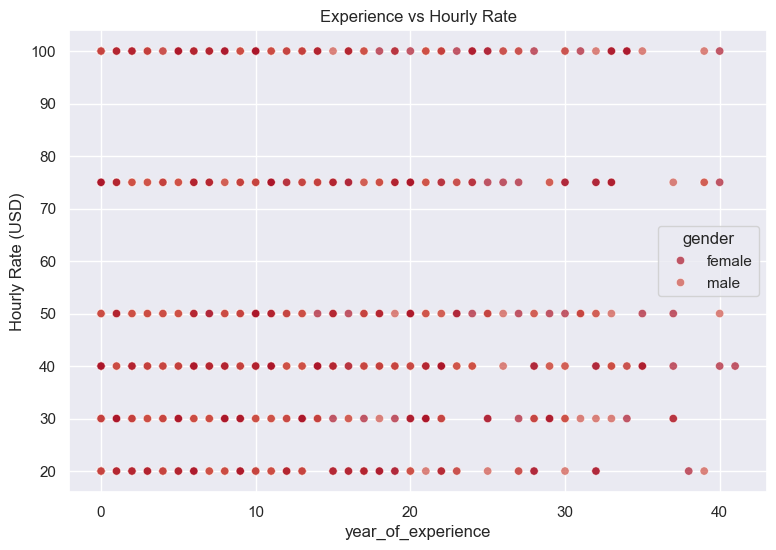

In [80]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=data_set, x="years_of_experience", y="hourly_rate_(USD)",hue='gender',color='teal',alpha=0.7)
plt.title("Experience vs Hourly Rate")
plt.xlabel("year_of_experience")
plt.ylabel("Hourly Rate (USD)")
plt.show()


1. Active Status by Gender
This plot shows the distribution of active vs non-active users across different genders.

2. Active Status by Top 5 Countries
This plot compares the active status distribution among users from the top 5 countries with the highest counts.

3. Rating Distribution by Active Status
This boxplot illustrates the distribution of ratings for active vs non-active users.

4. Experience Distribution by Active Status
This boxplot shows how years of experience differ between active and non-active users.

5. Active vs Non-Active (Pie Chart)
This pie chart visualizes the proportion of active vs non-active users.

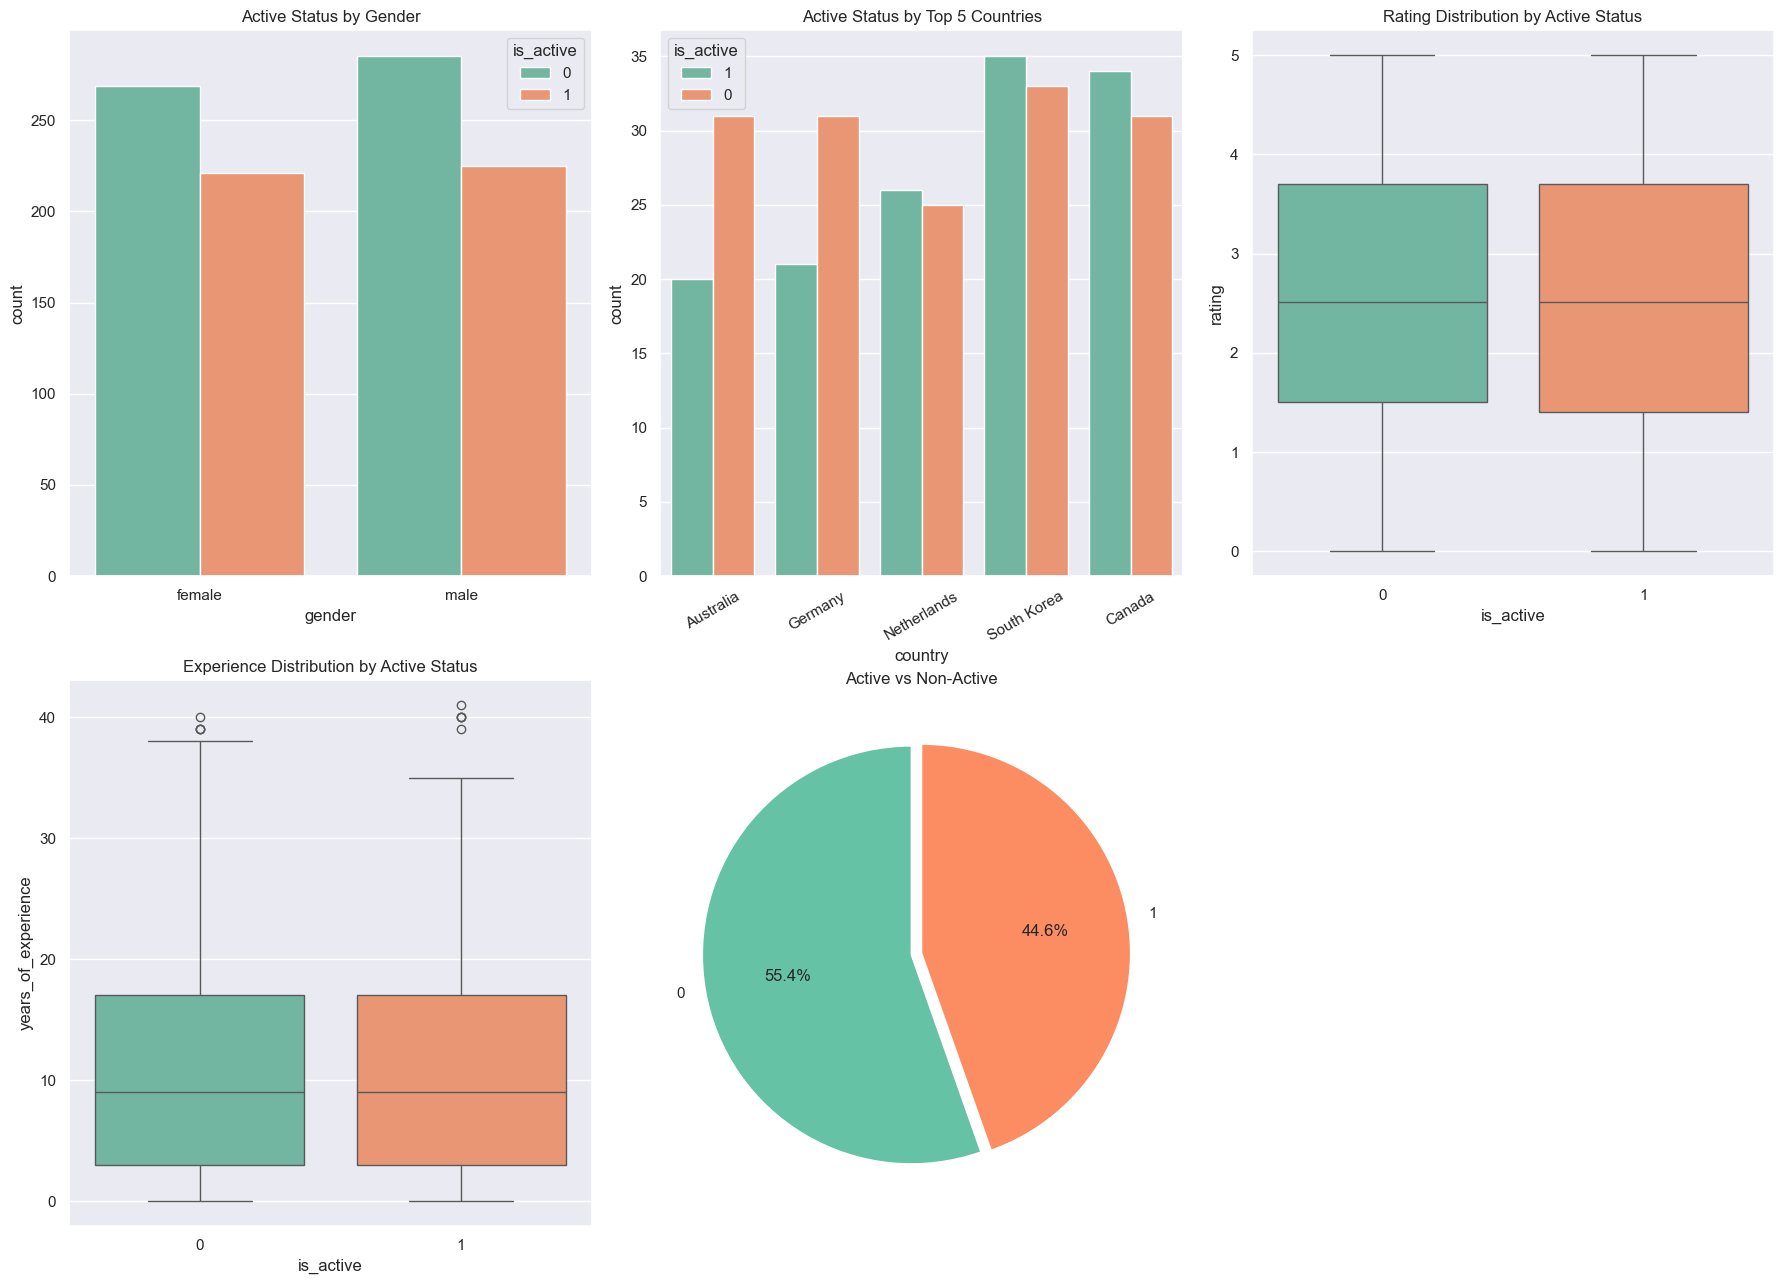

In [64]:
plt.figure(figsize=(18,13))


# 1. is_active vs Gender (Countplot)
plt.subplot(2, 3, 1)
sns.countplot(data=data_set, x="gender", hue="is_active", palette="Set2",)
plt.title("Active Status by Gender")

# 2. is_active vs Country (Countplot top 5 countries)
plt.subplot(2, 3, 2)
top_countries = data_set['country'].value_counts().nlargest(5).index
sns.countplot(data=data_set[data_set['country'].isin(top_countries)],
              x="country", hue="is_active", palette="Set2")
plt.title("Active Status by Top 5 Countries")
plt.xticks(rotation=30)

# 3. is_active vs Rating (Boxplot)
plt.subplot(2, 3, 3)

sns.boxplot(data=data_set, x="is_active", y="rating", palette="Set2")
plt.title("Rating Distribution by Active Status")

# 4. is_active vs Years of Experience (Boxplot)
plt.subplot(2, 3, 4)
sns.boxplot(data=data_set, x="is_active", y="years_of_experience", palette="Set2")
plt.title("Experience Distribution by Active Status")

# 5. Pie Chart (Active vs Non-active)
plt.subplot(2, 3, 5)
active_counts = data_set['is_active'].value_counts()
plt.pie(active_counts, labels=active_counts.index, autopct='%1.1f%%', colors=["#66c2a5","#fc8d62"], 
startangle=90 , explode=(0.05, 0))
plt.title("Active vs Non-Active")


plt.tight_layout()
plt.show()


### 
<div style="padding:10px;
            color:#0000FF;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #5096ffff;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Correlation Analysis</b>
</div>

### Correlation for Numerical Features


### Insights from Spearman Correlation

1. Age Years of Experience (0.6)  
   - Strong positive correlation: older individuals tend to have more experience, though not perfectly aligned.  

2. Hourly Rate (~0.07–0.08 with others)  
   - Very weak correlation with age, experience, and rating, suggesting external factors influence pay more.  

3. Rating (~0.0 with others)  
   - Ratings are almost independent of age, experience, and hourly rate, likely driven by client satisfaction or subjective factors.

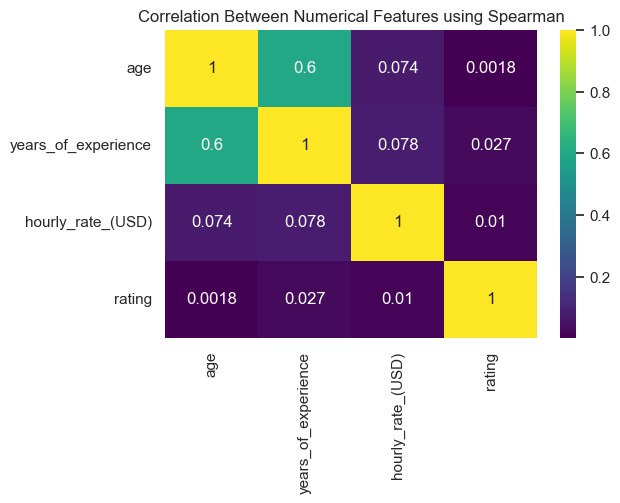

In [65]:
num_corr = data_set[num_col].corr(method='spearman')

sns.heatmap(num_corr, annot=True, cmap='viridis')
plt.title("Correlation Between Numerical Features using Spearman")
plt.show()